# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. **Tomek links** are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


# Step 0: Import libraries

In [1]:
# Step 0: Import libraries
import imblearn
import pandas as pd
import numpy as np
#Import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns


'''plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible
'''

"plt.style.use('ggplot')\n%matplotlib inline\nnp.set_printoptions(suppress=True) # Suppress scientific notation where possible\n"

In [2]:
#Import Models from SkLear library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, classification_report

# Step 1 load dataset

In [3]:
df = pd.read_csv("./files_for_lab/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Step 2: Cleaning / Prep

We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

3. Extract the target variable.


In [7]:
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

y = df.Churn

In [8]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
y.value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Plot the inbalance of the data

<Axes: xlabel='Churn'>

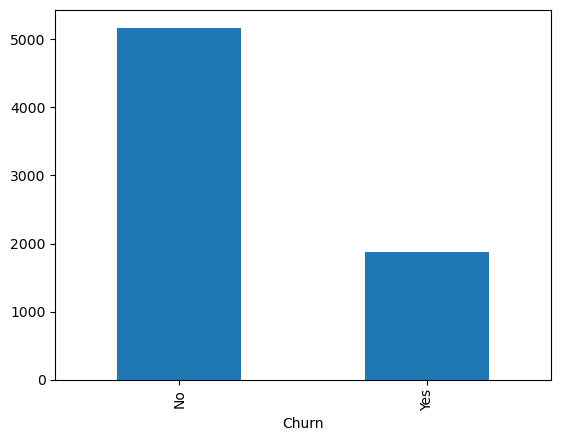

In [10]:
# and the cost of failing to detect the minority class is quite high (lack of diagnosis of diabetes)
count_classes = y.value_counts()
count_classes.plot(kind = 'bar')

# Step 4: Model 

### 4.1 Preprocessing

4. Extract the independent variables and scale them.

In [11]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()           # Create a scaler object  
X_scaled = scaler.fit_transform(X)   # Fit to data and transform 

In [12]:
print(X_scaled[:5])  # First 5 rows of scaled data  

[[-1.27744458 -0.43991649 -1.16032292]
 [ 0.06632742 -0.43991649 -0.25962894]
 [-1.23672422 -0.43991649 -0.36266036]
 [ 0.51425142 -0.43991649 -0.74653546]
 [-1.23672422 -0.43991649  0.19736523]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)

In [14]:
# As usual, create our train/test split with 70 vs 30% split & random state = 42
# This will become particularly important as we calculate our error metrics

5. Build the logistic regression model.

In [15]:
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


6. Evaluate the model.


In [16]:
# Evaluate the model
print("Logistic accuracy score train: {:6.4f}".format(lm.score(X_train,y_train)))
print("Logistic accuracy score test: {:6.4f}".format(lm.score(X_test,y_test)))

Logistic accuracy score train: 0.7899
Logistic accuracy score test: 0.7937


In [17]:
print("precision (basic model): ", precision_score(y_test, y_pred, pos_label='Yes'))
print("recall    (basic model): ", recall_score(y_test, y_pred, pos_label='Yes'))
print("f1        (basic model): ", f1_score(y_test, y_pred, pos_label='Yes'))

precision (basic model):  0.6835106382978723
recall    (basic model):  0.44773519163763065
f1        (basic model):  0.5410526315789473


Confusion Matrix:
 [[1420  119]
 [ 317  257]]


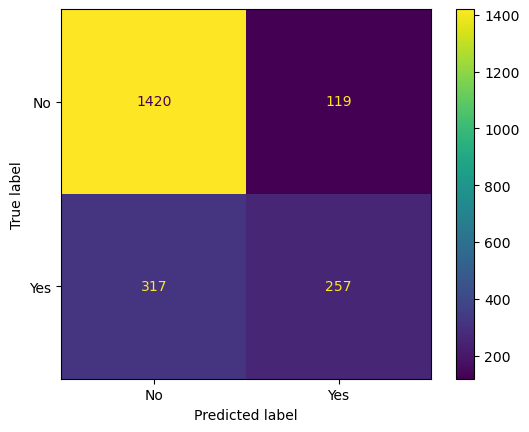

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  

# Predict on test data  
y_pred = lm.predict(X_test)  

# Create confusion matrix  
cm = confusion_matrix(y_test, y_pred)  
print("Confusion Matrix:\n", cm)  

# Plot it visually  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lm.classes_)  
disp.plot()  

In [19]:
############Import Confusion Matrix from SkLearn
from sklearn.metrics import confusion_matrix
####################################################
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, y_pred))


Logistic Regression confusion matrix: 

 [[1420  119]
 [ 317  257]]


#### DO Not understand
7. Even a simple model will give us more than 70% accuracy. Why?


If 75% of customers don’t churn (No), a model that always predicts No would be 75% "accurate" but useless.
Imbalanced data problem: The majority class (No) skews accuracy.

8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123,sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)


In [21]:
X_train_SMOTE

array([[ 0.88073469, -0.43991649,  0.19736523],
       [-1.27744458, -0.43991649,  0.52473924],
       [-0.78880022, -0.43991649, -1.51096208],
       ...,
       [-1.11456313, -0.43991649,  0.68368564],
       [ 0.45844613,  2.27315869,  1.55650229],
       [-0.86852753, -0.43991649,  1.19498644]], shape=(7270, 3))

In [22]:
y_train_SMOTE

0        No
1        No
2        No
3        No
4        No
       ... 
7265    Yes
7266    Yes
7267    Yes
7268    Yes
7269    Yes
Name: Churn, Length: 7270, dtype: object

<Axes: xlabel='Churn'>

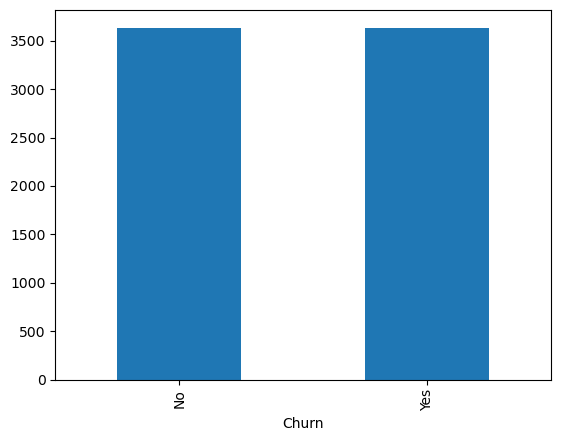

In [23]:
SMOTE_classes = y_train_SMOTE.value_counts()
SMOTE_classes.plot(kind = 'bar')

In [24]:
# from sklearn.linear_model import LogisticRegression

lm_SMOTE = LogisticRegression(max_iter=1000)
lm_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)


LogisticRegression(max_iter=1000)

In [25]:
y_pred_SMOTE = lm_SMOTE.predict(X_test)

In [26]:
# Evaluate the model
lm_SMOTE_score_train = lm_SMOTE.score(X_train_SMOTE,y_train_SMOTE)
lm_SMOTE_score_test = lm_SMOTE.score(X_test,y_test)

print(f"Logistic accuracy train score with SMOTE Resampling: {lm_SMOTE_score_train:.4f}")
print(f"Logistic accuracy train score with SMOTE Resampling: {lm_SMOTE_score_test:.4f}")

Logistic accuracy train score with SMOTE Resampling: 0.7241
Logistic accuracy train score with SMOTE Resampling: 0.7397


In [27]:
print("precision SMOTE Resampling: ", precision_score(y_test, y_pred_SMOTE, pos_label='Yes'))
print("recall    SMOTE Resampling: ", recall_score(y_test, y_pred_SMOTE, pos_label='Yes'))
print("f1        SMOTE Resampling: ", f1_score(y_test, y_pred_SMOTE, pos_label='Yes'))

precision SMOTE Resampling:  0.5142857142857142
recall    SMOTE Resampling:  0.7526132404181185
f1        SMOTE Resampling:  0.611032531824611


Confusion Matrix:
[[1131  408]
 [ 142  432]]

Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1539
         Yes       0.51      0.75      0.61       574

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.74      0.75      2113



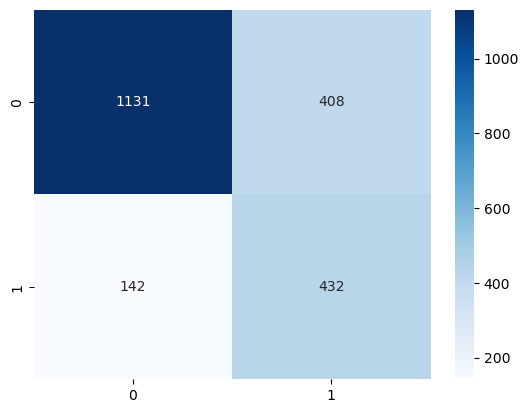

In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_SMOTE)
print("Confusion Matrix:")
print(cm)

# Full classification report (includes precision/recall/F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_SMOTE))

# Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

9. **Tomek links** are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [29]:
from imblearn.under_sampling import TomekLinks  

# Apply Tomek Links (use after SMOTE for best results)  
tomek = TomekLinks()  
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)  


In [30]:
# Retrain and evaluate  
lm_tomek = LogisticRegression()  
lm_tomek.fit(X_train_tomek, y_train_tomek)  
y_pred_tomek = lm_tomek.predict(X_test)

print(classification_report(y_test, y_pred_tomek))  

              precision    recall  f1-score   support

          No       0.83      0.88      0.86      1539
         Yes       0.63      0.52      0.57       574

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [32]:
print("precision Tomek Resampling: ", precision_score(y_test, y_pred_tomek, pos_label='Yes'))
print("recall    Tomek Resampling: ", recall_score(y_test, y_pred_tomek, pos_label='Yes'))
print("f1        Tomek Resampling: ", f1_score(y_test, y_pred_tomek, pos_label='Yes'))

precision Tomek Resampling:  0.6255230125523012
recall    Tomek Resampling:  0.5209059233449478
f1        Tomek Resampling:  0.5684410646387833


---------